<a href="https://colab.research.google.com/github/Mohammed-Taher6705/jigsaw-puzzle-matching/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/Mohammed-Taher6705/jigsaw-puzzle-matching.git

Cloning into 'jigsaw-puzzle-matching'...
remote: Enumerating objects: 1224, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 1224 (delta 14), reused 13 (delta 13), pack-reused 1206 (from 2)
Receiving objects: 100% (1224/1224), 139.21 MiB | 44.13 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [3]:
import zipfile
import os

zip_path = "/content/jigsaw-puzzle-matching/Task2_output.zip"
extract_path = "/content/Task2_output"

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_path)

print("Extracted to:", extract_path)
print("Folders inside extracted dataset:", os.listdir(extract_path))


Extracted to: /content/Task2_output
Folders inside extracted dataset: ['Task2_output']


In [7]:
import cv2
from glob import glob

# Input root folder (contains puzzle_2x2 / puzzle_4x4 / puzzle_8x8)
input_root = "/content/Task2_output/Task2_output"
output_root = "/content/Task3_output"
os.makedirs(output_root, exist_ok=True)


In [8]:
# Mapping folder names to grid size
grid_map = {
    "puzzle_2x2": 2,
    "puzzle_4x4": 4,
    "puzzle_8x8": 8
}

def crop_grid(image_path, N, save_dir):
    img = cv2.imread(image_path)
    h, w = img.shape[:2]

    cell_h = h // N
    cell_w = w // N
    basename = os.path.splitext(os.path.basename(image_path))[0]

    for row in range(N):
        for col in range(N):
            x1 = col * cell_w
            y1 = row * cell_h
            x2 = x1 + cell_w
            y2 = y1 + cell_h
            piece = img[y1:y2, x1:x2]
            save_path = f"{save_dir}/{basename}_r{row}_c{col}.jpg"
            cv2.imwrite(save_path, piece)

    print(f"Done: {basename} → {N*N} pieces")


In [9]:
# Loop through each folder and crop images
for folder_name, N in grid_map.items():
    in_folder = os.path.join(input_root, folder_name)
    out_folder = os.path.join(output_root, folder_name)
    os.makedirs(out_folder, exist_ok=True)

    image_paths = sorted(glob(os.path.join(in_folder, "*.jpg")) +
                         glob(os.path.join(in_folder, "*.png")))

    print(f"\nProcessing folder: {folder_name} ({N}x{N}) — {len(image_paths)} images")

    for img_path in image_paths:
        crop_grid(img_path, N, out_folder)

print("\nALL DONE! Cropped puzzle pieces saved in:", output_root)



Processing folder: puzzle_2x2 (2x2) — 110 images
Done: 0 → 4 pieces
Done: 1 → 4 pieces
Done: 10 → 4 pieces
Done: 100 → 4 pieces
Done: 101 → 4 pieces
Done: 102 → 4 pieces
Done: 103 → 4 pieces
Done: 104 → 4 pieces
Done: 105 → 4 pieces
Done: 106 → 4 pieces
Done: 107 → 4 pieces
Done: 108 → 4 pieces
Done: 109 → 4 pieces
Done: 11 → 4 pieces
Done: 12 → 4 pieces
Done: 13 → 4 pieces
Done: 14 → 4 pieces
Done: 15 → 4 pieces
Done: 16 → 4 pieces
Done: 17 → 4 pieces
Done: 18 → 4 pieces
Done: 19 → 4 pieces
Done: 2 → 4 pieces
Done: 20 → 4 pieces
Done: 21 → 4 pieces
Done: 22 → 4 pieces
Done: 23 → 4 pieces
Done: 24 → 4 pieces
Done: 25 → 4 pieces
Done: 26 → 4 pieces
Done: 27 → 4 pieces
Done: 28 → 4 pieces
Done: 29 → 4 pieces
Done: 3 → 4 pieces
Done: 30 → 4 pieces
Done: 31 → 4 pieces
Done: 32 → 4 pieces
Done: 33 → 4 pieces
Done: 34 → 4 pieces
Done: 35 → 4 pieces
Done: 36 → 4 pieces
Done: 37 → 4 pieces
Done: 38 → 4 pieces
Done: 39 → 4 pieces
Done: 4 → 4 pieces
Done: 40 → 4 pieces
Done: 41 → 4 pieces
Done:

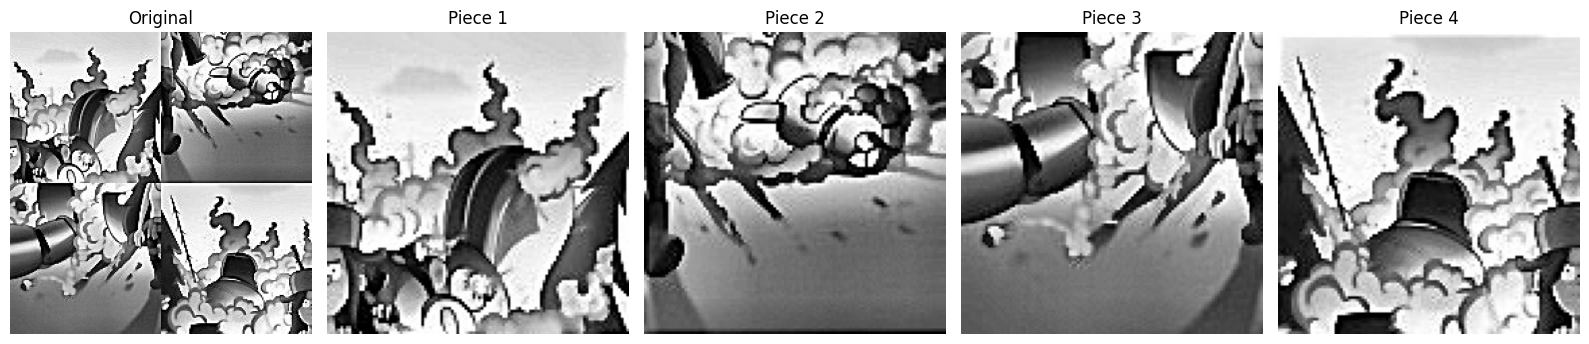

In [12]:
import matplotlib.pyplot as plt

# Paths to original and cropped pieces
original_path = "/content/Task2_output/Task2_output/puzzle_2x2/100.jpg"
pieces_paths = [
    "/content/Task3_output/puzzle_2x2/100_r0_c0.jpg",
    "/content/Task3_output/puzzle_2x2/100_r0_c1.jpg",
    "/content/Task3_output/puzzle_2x2/100_r1_c0.jpg",
    "/content/Task3_output/puzzle_2x2/100_r1_c1.jpg"
]

# Load images
original_img = cv2.cvtColor(cv2.imread(original_path), cv2.COLOR_BGR2RGB)
pieces_imgs = [cv2.cvtColor(cv2.imread(p), cv2.COLOR_BGR2RGB) for p in pieces_paths]

# Plot all images side by side
plt.figure(figsize=(16, 4))
plt.subplot(1, 5, 1)
plt.imshow(original_img)
plt.title("Original")
plt.axis("off")

for i, piece in enumerate(pieces_imgs):
    plt.subplot(1, 5, i+2)
    plt.imshow(piece)
    plt.title(f"Piece {i+1}")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [13]:
import shutil
import os

# Source folder to zip
source_folder = "/content/Task3_output"

# Destination folder (repo folder)
dest_folder = "/content/jigsaw-puzzle-matching"
os.makedirs(dest_folder, exist_ok=True)

# Destination zip file path
zip_path = os.path.join(dest_folder, "Task3_output.zip")

# Create zip file
shutil.make_archive(base_name=zip_path.replace('.zip',''), format='zip', root_dir=source_folder)

print(f"Folder zipped successfully at: {zip_path}")


Folder zipped successfully at: /content/jigsaw-puzzle-matching/Task3_output.zip
